This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [209]:
using LinearAlgebra
using Plots

In [210]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [211]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [212]:
function get_D_angle(D,n)
    angle= rad2deg(acos(D[n,n]))
    return angle
  end

get_D_angle (generic function with 2 methods)

In [213]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [214]:
n=3
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([1.1451367804761117 0.7882435938155206 0.6090700912581315; -0.5732378299747993 0.6235793986748297 -2.202649557427735; -0.05502395836056023 0.7181058737059491 -0.2776594149016318], [1.5019195518921027 1.2143788853687654 0.0; 1.17912175231e-311 1.3195431869988348 0.0; 1.1791221385863e-311 1.179122478539e-311 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([0.9844524973113721 0.3674640736926718 0.016678723798518938; 0.004351952011349314 0.7822566766818814 0.7197678153397888; -0.08591685438200303 0.41006605158401016 -0.01438621123849504], [1.9853074436921516 0.10496142967909597 0.0; 1.17912175231e-311 1.7121027832443663 0.0; 1.1791221385863e-311 1.179122478539e-311 0.0]), [-0.5019195518921027 -0.3534217806454134; 0.860957104723352 -0.1169484523958284; 0.08264155888422234 -0.9281250478505826], [-0.7894110516035716; -0.4950514350131751; 0.3629797078316356;;], [-0.9853074436921516 -0.1136013924

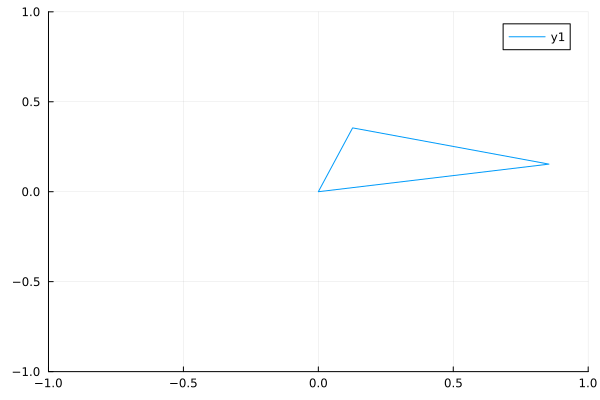

In [215]:
points=draw(E1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

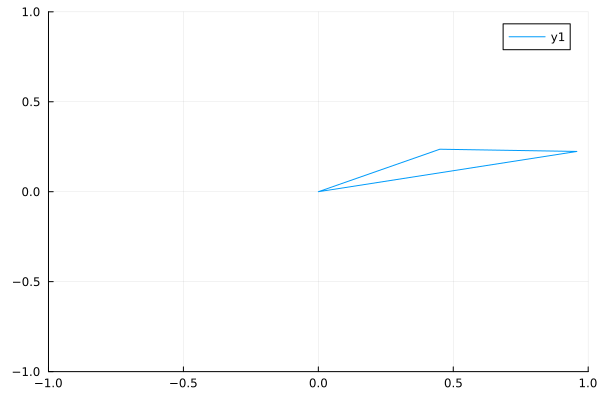

In [216]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

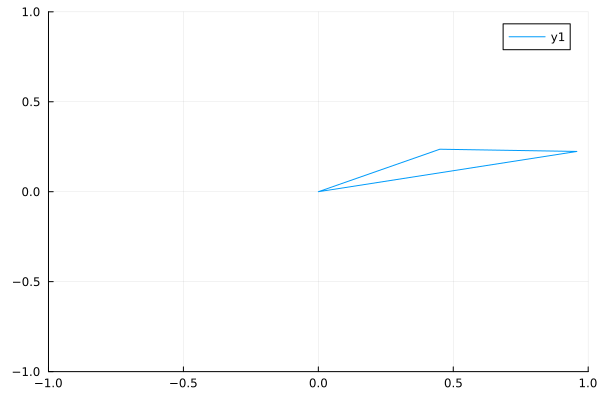

In [223]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1*V1', n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

In [218]:
display(get_D_angle(D,n))
display(D)


59.92610573778696

3×3 Matrix{Float64}:
  1.0          1.38778e-16  -2.08436e-16
  9.71445e-17  0.501116     -0.86538
 -1.6186e-16   0.86538       0.501116

[I   0   0\
 0   C   -S\
 0   S    C]

In [224]:

function smooth_transition()
    W, U, U1, U2, V1, V2, D = cs_decomposition(n, E, F, E1, E2, F1, F2)
    max_angle = get_D_angle(D)
    anim = @animate for angle in 0:1:max_angle
        D[2,2] = cosd(angle)
        D[2,3] = -sind(angle)
        D[3,2] = sind(angle)
        D[3,3] = cosd(angle)
        W = E * U * D * U' * E'
        points = draw(W *E1*U1*V1' , n)
        plot(points[1, :], points[2, :], xlim = [-1, 1], ylim = [-1, 1], legend = true, label = "Angle: $angle")
    end
    gif(anim, "smooth_transition.gif", fps = 10) # Save the animation as a GIF
end

smooth_transition (generic function with 1 method)

┌ Info: Saved animation to d:\Docs matheus\UFRJ\IC\Códigos\CSD-Polygons\smooth_transition.gif
└ @ Plots C:\Users\mathe\.julia\packages\Plots\Pe7wF\src\animation.jl:156


Plots.AnimatedGif("d:\\Docs matheus\\UFRJ\\IC\\Códigos\\CSD-Polygons\\smooth_transition.gif")
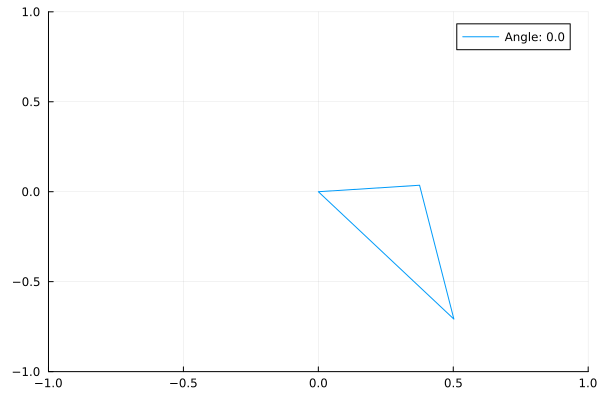

In [225]:
smooth_transition()

In [221]:
rad2deg(acos(0.5))
deg2rad(60)

1.0471975511965976